In [1]:
import math
import random
import matplotlib.pyplot as plt

#First function to optimize
def function1(x):
    value = -x**2
    return value

#Second function to optimize
def function2(x):
    value = -(x-2)**2
    return value

#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list

#Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

#Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

#Function to carry out the crossover
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

#Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution

#Main program starts here
pop_size = 20
max_gen = 921

#Initialization
min_x=-55
max_x=55
solution=[min_x+(max_x-min_x)*random.random() for i in range(0,pop_size)]
gen_no=0
while(gen_no<max_gen):
    function1_values = [function1(solution[i])for i in range(0,pop_size)]
    function2_values = [function2(solution[i])for i in range(0,pop_size)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
    print("The best front for Generation number ",gen_no, " is")
    for valuez in non_dominated_sorted_solution[0]:
        print(round(solution[valuez],3),end=" ")
    print("\n")
    crowding_distance_values=[]
    for i in range(0,len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
    solution2 = solution[:]
    #Generating offsprings
    while(len(solution2)!=2*pop_size):
        a1 = random.randint(0,pop_size-1)
        b1 = random.randint(0,pop_size-1)
        solution2.append(crossover(solution[a1],solution[b1]))
    function1_values2 = [function1(solution2[i])for i in range(0,2*pop_size)]
    function2_values2 = [function2(solution2[i])for i in range(0,2*pop_size)]
    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
    crowding_distance_values2=[]
    for i in range(0,len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))
    new_solution= []
    for i in range(0,len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if(len(new_solution)==pop_size):
                break
        if (len(new_solution) == pop_size):
            break
    solution = [solution2[i] for i in new_solution]
    gen_no = gen_no + 1

#Lets plot the final front now
function1 = [i * -1 for i in function1_values]
function2 = [j * -1 for j in function2_values]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

The best front for Generation number  0  is
-4.669 

The best front for Generation number  1  is
3.247 -2.178 

The best front for Generation number  2  is
2.495 -2.178 

The best front for Generation number  3  is
0.457 2.495 

The best front for Generation number  4  is
2.353 0.457 0.221 

The best front for Generation number  5  is
1.13 2.353 0.457 0.221 0.379 

The best front for Generation number  6  is
0.379 1.13 2.353 0.457 0.221 

The best front for Generation number  7  is
1.449 0.379 1.13 2.353 0.457 0.221 

The best front for Generation number  8  is
0.583 1.449 1.13 0.379 0.457 2.353 0.221 

The best front for Generation number  9  is
0.221 0.583 1.13 1.449 0.457 0.379 2.353 

The best front for Generation number  10  is
2.353 0.221 1.13 0.583 0.457 1.449 0.379 

The best front for Generation number  11  is
0.379 2.353 1.13 0.221 0.457 0.583 1.449 

The best front for Generation number  12  is
2.207 0.379 0.221 1.13 0.583 0.457 1.449 

The best front for Generation number  

1.827 0.472 0.457 1.123 1.13 0.274 0.798 1.284 0.379 1.098 1.328 1.449 1.55 0.963 0.583 0.922 0.221 1.542 0.067 0.793 

The best front for Generation number  74  is
0.839 1.827 0.274 0.472 1.123 0.457 1.13 0.922 0.798 1.284 1.328 0.221 0.963 0.067 1.55 0.379 1.542 1.098 1.449 0.583 

The best front for Generation number  75  is
0.583 0.839 0.457 1.827 0.472 0.274 1.123 1.55 1.13 0.922 0.379 1.098 0.963 1.542 0.067 0.798 1.284 0.221 1.328 1.449 

The best front for Generation number  76  is
1.736 0.583 0.839 1.123 0.472 1.827 0.274 0.457 1.55 1.284 0.221 0.798 0.067 0.922 1.542 1.098 1.13 0.963 1.449 1.328 

The best front for Generation number  77  is
1.328 1.736 0.583 1.123 0.839 0.472 0.274 1.827 1.13 1.55 0.922 0.798 0.457 1.098 1.284 0.221 1.449 0.067 1.542 0.963 

The best front for Generation number  78  is
0.963 1.328 1.736 1.123 0.583 0.839 0.274 0.472 1.449 1.13 1.098 0.798 1.827 1.55 0.922 0.221 1.542 0.457 1.284 0.067 

The best front for Generation number  79  is
0.147 0.96

1.425 0.834 1.55 1.875 0.208 0.583 0.147 0.213 1.911 0.798 1.123 0.793 2.065 0.472 0.221 0.97 0.844 1.229 1.376 0.274 

The best front for Generation number  144  is
0.737 1.425 0.583 1.123 0.208 1.875 0.798 0.793 0.213 1.911 0.147 1.55 2.065 0.472 0.97 0.221 0.834 0.844 1.229 1.376 

The best front for Generation number  145  is
1.376 0.737 0.147 1.911 0.208 1.55 0.213 1.123 0.793 0.583 2.065 1.875 0.798 0.221 0.472 0.97 0.844 1.425 0.834 1.229 

The best front for Generation number  146  is
1.229 1.376 2.065 0.583 0.208 1.875 0.793 1.911 0.147 1.123 1.55 0.798 0.213 0.97 0.221 0.472 1.425 0.737 0.844 0.834 

The best front for Generation number  147  is
0.834 1.229 0.208 0.583 1.123 1.55 2.065 0.147 0.798 1.875 1.911 0.793 0.213 1.376 0.97 0.221 0.472 0.737 1.425 0.844 

The best front for Generation number  148  is
0.844 0.834 1.911 1.875 1.123 0.583 0.793 0.798 0.208 0.147 1.55 2.065 0.213 1.376 0.221 0.97 1.229 0.737 0.472 1.425 

The best front for Generation number  149  is
1.42

1.091 1.672 1.139 0.844 0.906 0.688 0.641 1.86 0.096 0.472 1.544 1.63 1.934 0.793 0.378 0.737 1.179 1.271 0.213 0.97 

The best front for Generation number  223  is
0.97 1.091 1.672 0.096 0.472 1.544 1.63 1.86 1.934 0.641 0.906 0.793 1.139 0.688 0.844 0.378 0.737 1.179 0.213 1.271 

The best front for Generation number  224  is
1.821 0.97 1.091 0.641 1.934 0.906 1.139 0.793 0.688 1.86 1.63 1.672 0.096 0.472 0.844 1.921 1.544 0.378 1.271 0.737 

The best front for Generation number  225  is
0.737 1.821 0.97 1.86 1.63 0.688 1.672 0.793 1.139 0.641 0.096 1.091 0.906 0.472 1.934 1.271 0.844 1.544 0.378 1.921 

The best front for Generation number  226  is
0.494 0.737 0.096 0.641 1.091 0.906 1.821 1.139 0.793 0.472 1.672 1.63 1.86 0.97 0.688 1.934 1.271 0.844 0.829 1.921 

The best front for Generation number  227  is
0.515 0.494 1.672 0.472 0.793 1.63 1.86 1.139 0.737 0.97 1.821 0.906 1.091 0.641 0.688 1.934 0.096 1.921 0.829 1.271 

The best front for Generation number  228  is
1.271 0.51

1.622 0.793 1.091 0.593 1.898 1.249 2.019 0.472 1.345 1.007 0.077 1.079 1.7 1.849 1.139 1.826 1.703 0.866 1.821 1.846 

The best front for Generation number  290  is
1.846 1.622 0.793 1.091 0.593 1.821 1.345 1.007 0.866 1.703 1.249 1.898 0.472 2.019 0.077 1.826 1.079 1.7 1.139 1.849 

The best front for Generation number  291  is
1.849 1.846 1.622 1.139 0.793 1.7 1.091 1.079 0.866 1.703 1.821 1.826 1.249 0.593 1.898 0.077 1.007 0.472 1.345 2.019 

The best front for Generation number  292  is
2.019 1.849 1.846 1.622 1.139 1.345 0.866 1.703 0.472 1.007 1.7 0.793 1.079 1.091 1.821 0.077 1.826 1.249 1.898 0.593 

The best front for Generation number  293  is
0.593 2.019 1.849 1.846 1.622 1.898 0.472 1.007 1.249 1.345 1.826 1.139 1.703 0.866 1.7 0.793 0.077 1.079 1.821 1.091 

The best front for Generation number  294  is
1.091 0.593 2.019 1.821 1.849 1.079 1.846 0.077 1.249 1.345 1.898 0.793 1.826 1.622 1.139 1.7 1.007 1.703 0.472 0.866 

The best front for Generation number  295  is
0.86

0.341 1.669 -0.033 1.039 0.793 0.263 1.133 0.444 0.762 1.826 1.622 0.228 1.259 1.319 1.953 1.703 0.565 0.818 1.602 1.091 

The best front for Generation number  373  is
1.091 0.341 1.669 -0.033 1.039 0.263 0.793 1.133 0.444 1.826 1.622 0.762 1.259 0.228 0.565 0.818 1.703 1.602 1.953 1.319 

The best front for Generation number  374  is
0.785 1.091 0.341 1.622 1.826 0.263 0.762 1.133 1.669 -0.033 1.259 0.444 0.793 1.039 0.228 0.565 1.953 1.703 1.319 1.602 

The best front for Generation number  375  is
0.091 0.785 1.091 0.263 0.341 1.133 1.259 0.762 1.622 1.039 1.669 0.793 1.826 1.703 -0.033 1.319 0.444 0.565 1.953 1.602 

The best front for Generation number  376  is
1.602 0.091 0.785 1.091 1.133 0.263 0.762 1.826 1.039 1.259 1.669 0.341 0.444 0.565 1.622 0.793 1.953 1.319 -0.033 1.703 

The best front for Generation number  377  is
0.861 1.602 0.091 0.785 1.669 0.263 1.091 1.039 1.259 1.826 0.444 0.341 0.565 0.762 1.133 1.319 -0.033 1.703 1.953 0.793 

The best front for Generation nu

The best front for Generation number  456  is
1.193 0.091 1.708 1.435 0.858 1.133 1.473 1.357 1.19 1.503 0.28 0.773 0.74 1.597 1.35 1.602 0.367 1.669 1.982 0.444 

The best front for Generation number  457  is
0.444 1.193 0.091 1.708 1.669 0.858 1.435 1.602 1.982 0.367 1.133 1.35 1.473 1.597 1.357 0.74 1.503 0.28 1.19 0.773 

The best front for Generation number  458  is
0.773 0.444 1.193 0.091 1.669 1.708 0.28 0.858 0.74 1.503 1.19 1.435 1.602 1.357 1.597 1.473 1.982 0.367 1.133 1.35 

The best front for Generation number  459  is
1.35 0.773 0.444 1.193 0.367 1.669 0.091 1.473 1.133 1.982 1.708 1.597 0.28 1.357 0.858 1.602 1.503 1.19 0.74 1.435 

The best front for Generation number  460  is
1.435 1.35 0.773 0.444 0.367 1.193 1.19 1.669 1.602 1.503 0.74 0.091 1.473 0.858 1.357 0.28 1.133 1.982 1.708 1.597 

The best front for Generation number  461  is
0.838 1.435 1.35 0.773 0.367 0.444 1.708 1.19 1.193 1.133 1.982 1.357 1.597 1.669 1.602 0.28 1.503 1.473 0.858 0.091 

The best front 

0.045 0.275 -0.021 2.107 0.382 1.153 0.554 0.501 1.79 0.958 0.882 1.342 1.708 0.84 1.572 1.876 1.717 0.28 0.838 0.034 

The best front for Generation number  538  is
0.034 0.045 1.79 0.554 0.501 1.342 0.882 0.958 1.153 0.275 2.107 -0.021 1.708 0.382 0.84 1.717 1.876 1.572 0.28 0.838 

The best front for Generation number  539  is
0.09 0.034 0.958 0.275 0.882 1.153 -0.021 0.501 0.382 1.342 2.107 1.708 1.79 0.045 0.554 0.84 0.28 1.876 1.717 1.572 

The best front for Generation number  540  is
1.572 0.09 0.501 1.342 0.382 -0.021 2.107 1.79 1.708 0.882 1.153 0.958 0.275 0.034 0.045 1.876 0.84 0.554 0.28 1.717 

The best front for Generation number  541  is
1.717 1.572 1.79 0.882 2.107 1.708 1.153 0.275 0.958 0.382 -0.021 0.501 1.342 0.09 0.034 0.554 1.876 0.045 0.84 0.28 

The best front for Generation number  542  is
0.999 1.717 0.275 1.153 0.382 0.958 2.107 1.708 0.501 0.09 1.79 1.572 0.882 1.342 -0.021 0.034 1.876 0.84 0.554 0.045 

The best front for Generation number  543  is
0.045 0

1.971 1.376 0.763 0.873 1.11 1.79 1.076 0.879 1.992 0.331 0.856 0.81 0.987 0.382 0.601 0.09 0.835 1.778 1.572 1.708 

The best front for Generation number  623  is
1.708 1.971 1.376 0.331 1.992 0.856 0.81 0.879 1.076 0.763 0.987 0.873 1.79 1.11 0.382 1.572 0.601 0.835 0.09 1.778 

The best front for Generation number  624  is
1.778 1.708 0.763 0.987 0.873 1.076 1.971 0.879 0.81 1.79 1.376 1.11 0.331 0.856 0.09 1.992 0.601 0.382 1.572 0.835 

The best front for Generation number  625  is
0.835 1.778 1.708 1.79 0.81 1.376 1.11 0.879 1.971 0.763 0.331 0.987 1.076 0.873 0.856 1.572 0.09 0.601 1.992 0.382 

The best front for Generation number  626  is
0.382 0.835 0.763 0.331 0.987 1.971 1.778 0.879 1.076 1.11 0.873 1.708 1.79 1.992 1.376 0.81 0.09 0.856 1.572 0.601 

The best front for Generation number  627  is
0.601 0.382 1.11 0.873 1.708 1.076 0.835 0.879 1.79 1.778 1.992 0.763 0.331 1.572 1.971 0.987 0.09 1.376 0.81 0.856 

The best front for Generation number  628  is
0.856 0.601 1.77

-0.02 0.873 0.666 1.967 0.348 0.162 1.376 0.81 1.751 0.59 0.601 1.535 1.746 0.857 1.281 0.849 0.555 1.254 1.978 0.328 

The best front for Generation number  706  is
0.198 -0.02 0.59 1.535 0.81 0.601 0.873 1.751 0.162 1.967 0.857 0.348 1.746 1.376 0.666 1.281 0.849 1.254 0.555 0.328 

The best front for Generation number  707  is
0.328 0.198 0.162 1.967 0.348 0.873 0.857 1.535 1.751 0.601 -0.02 0.81 1.376 0.59 1.746 0.666 1.281 0.849 1.254 0.555 

The best front for Generation number  708  is
0.555 0.328 1.751 0.601 0.81 -0.02 0.857 0.59 1.535 1.376 1.967 0.873 0.348 0.162 0.198 1.746 0.666 1.281 0.849 1.254 

The best front for Generation number  709  is
1.254 0.555 1.535 1.376 0.873 1.967 0.857 0.162 0.59 0.348 0.601 -0.02 0.81 1.751 0.328 0.198 1.746 0.666 1.281 0.849 

The best front for Generation number  710  is
0.849 1.254 0.59 0.348 -0.02 0.601 0.857 1.751 0.162 0.81 1.376 1.967 0.873 1.535 0.555 0.328 0.198 1.746 0.666 1.281 

The best front for Generation number  711  is
1.28

0.207 -0.071 1.146 0.522 0.86 1.287 0.873 1.79 1.32 1.376 2.003 0.87 1.967 0.81 0.66 1.56 0.276 1.795 1.281 0.348 

The best front for Generation number  790  is
0.348 0.207 -0.071 0.86 0.522 1.287 0.873 1.376 1.146 1.32 0.87 2.003 0.81 1.967 1.79 0.66 0.276 1.281 1.795 1.56 

The best front for Generation number  791  is
0.416 0.348 0.207 0.522 1.287 1.32 0.86 2.003 0.873 0.87 1.79 1.146 1.376 0.66 0.81 1.967 -0.071 1.281 0.276 1.56 

The best front for Generation number  792  is
1.56 0.416 0.522 1.287 0.348 1.32 1.79 0.87 0.207 0.873 0.81 1.146 0.86 1.967 2.003 0.66 1.376 -0.071 0.276 1.281 

The best front for Generation number  793  is
1.281 1.56 1.287 0.348 0.416 1.32 0.81 0.873 0.522 0.207 2.003 1.146 0.66 1.79 0.87 1.967 0.86 1.376 0.276 -0.071 

The best front for Generation number  794  is
0.993 1.281 0.348 0.416 1.56 1.32 2.003 1.146 0.207 1.287 1.967 0.81 0.86 0.873 0.522 0.66 0.87 1.79 1.376 -0.071 

The best front for Generation number  795  is
-0.071 0.993 1.281 0.348 0.4

0.209 1.18 0.941 1.807 0.57 0.943 2.019 0.993 1.875 0.563 0.265 1.146 0.107 1.702 0.319 0.169 1.287 1.283 1.367 1.271 

The best front for Generation number  873  is
1.776 0.209 0.943 0.57 1.807 1.18 0.993 0.941 2.019 1.283 1.367 1.702 0.169 0.319 1.271 1.287 0.265 1.875 0.107 0.563 

The best front for Generation number  874  is
0.563 1.776 1.18 1.807 0.209 0.57 0.943 0.941 0.993 0.169 1.271 0.265 0.319 2.019 1.283 1.875 1.367 1.702 1.287 0.107 

The best front for Generation number  875  is
0.107 0.563 0.57 0.209 1.776 1.807 1.18 0.941 0.943 0.319 1.283 1.367 2.019 0.993 0.169 1.702 1.271 0.265 1.875 1.287 

The best front for Generation number  876  is
1.287 0.107 1.807 1.776 0.563 0.209 0.57 0.941 1.18 2.019 1.271 0.169 0.993 0.265 0.943 0.319 1.283 1.367 1.702 1.875 

The best front for Generation number  877  is
1.812 1.287 0.209 0.107 0.941 1.807 1.776 1.367 1.702 0.563 0.57 0.265 1.875 0.319 0.993 1.283 1.18 1.271 0.169 2.019 

The best front for Generation number  878  is
2.01

<Figure size 640x480 with 1 Axes>

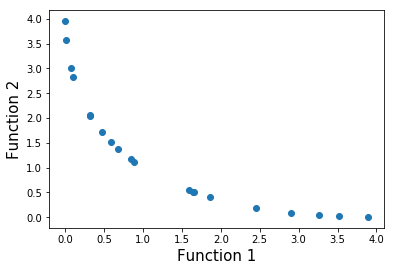

In [2]:
#Lets plot the final front now
function1 = [i * -1 for i in function1_values]
function2 = [j * -1 for j in function2_values]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()